# Find the best neural network structure

## 1) Import libraries

In [24]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from IPython.display import display, Markdown, clear_output
import fidle.pwk as ooo
from importlib import reload
import modele_fit as mf
from pathos.multiprocessing import ProcessingPool as Pool
from math import ceil
from time import sleep
from mpl_toolkits import mplot3d
import tensorflow as tf
import datetime

## 2) Evaluate the dispersion of evaluation criteria (MAE, MSE) for 1000 test of the same neural network on the same database.

### 2) a. Parameters of neural networks 

In [26]:
frac_train=0.8
shape=(5,) 
input_list=['Zr_at','Nb_at','Mo_at','Ti_at','Cr_at']
output_list= ['E (GPa)','H (GPa)']
               

nb_layers=2
list_neurones=[20,20]
output_neurones= 2
list_act=['relu','relu']
f_opt='rmsprop'
crit_loss='mse'
list_metrics=['mse','mae']
nb_epochs=200
filename='A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv'


best_model_dir=[]
best_model_name=[]
for i in range (0,1000):
    best_model_dir.append('Best_network/Repetitions/Repetition_num_'+str(i))
    best_model_name.append('Repetition_num_'+str(i)) 

### 2) b. Execute the model 1000 times in parallele pool

In [30]:
nb_threads = 10 # number of proc that can work in parallel
work_list=[] # argument list of the fonction that is going to run in parallel
for i in range (0,1000): # generate work list
    work_list.append([filename,
                      frac_train, 
                      shape, 
                      input_list, 
                      output_list,
                      nb_layers,
                      list_neurones,
                      output_neurones,
                      list_act,
                      f_opt,
                      crit_loss,
                      list_metrics,
                      nb_epochs,
                      best_model_dir[i],
                      best_model_name[i]])

nb_batch = ceil(len(work_list)/ nb_threads) # batch: group of nb_thread that are going to be run
    
tasks_lists = []
for i in range(nb_batch): # group the work list element per batch
    tasks_list = [] # correspond to the arguments of the function that are going to be run in parallel in batch i
    for args in work_list[nb_threads*i:nb_threads*(i+1)]:
        tasks_list.append(args)
    tasks_lists += [tasks_list]  #list of list 
list_x_test=[]
list_y_test=[]
list_x_train=[]
list_y_train=[]   
for i in range(nb_batch):
    print("running batch:" + str(i))
    print(tasks_lists[i])
    pool = Pool(process=1)
    X_Y=pool.map(mf.regression, tasks_lists[i])
        
    for j in range (nb_threads):
        list_x_test.append(X_Y[j][0])
        list_y_test.append(X_Y[j][1])
        list_x_train.append(X_Y[j][2])
        list_y_train.append(X_Y[j][3])
           

running batch:0
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_0', 'Repetition_num_0'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_1', 'Repetition_num_1'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_2', 'Repetition_num_2'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8,

running batch:3
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_30', 'Repetition_num_30'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_31', 'Repetition_num_31'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_32', 'Repetition_num_32'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv'

running batch:6
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_60', 'Repetition_num_60'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_61', 'Repetition_num_61'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_62', 'Repetition_num_62'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv'

running batch:9
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_90', 'Repetition_num_90'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_91', 'Repetition_num_91'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_92', 'Repetition_num_92'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv'

running batch:12
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_120', 'Repetition_num_120'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_121', 'Repetition_num_121'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_122', 'Repetition_num_122'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:15
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_150', 'Repetition_num_150'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_151', 'Repetition_num_151'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_152', 'Repetition_num_152'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:18
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_180', 'Repetition_num_180'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_181', 'Repetition_num_181'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_182', 'Repetition_num_182'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:21
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_210', 'Repetition_num_210'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_211', 'Repetition_num_211'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_212', 'Repetition_num_212'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:24
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_240', 'Repetition_num_240'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_241', 'Repetition_num_241'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_242', 'Repetition_num_242'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:27
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_270', 'Repetition_num_270'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_271', 'Repetition_num_271'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_272', 'Repetition_num_272'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:30
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_300', 'Repetition_num_300'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_301', 'Repetition_num_301'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_302', 'Repetition_num_302'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:33
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_330', 'Repetition_num_330'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_331', 'Repetition_num_331'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_332', 'Repetition_num_332'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:36
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_360', 'Repetition_num_360'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_361', 'Repetition_num_361'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_362', 'Repetition_num_362'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:39
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_390', 'Repetition_num_390'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_391', 'Repetition_num_391'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_392', 'Repetition_num_392'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:42
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_420', 'Repetition_num_420'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_421', 'Repetition_num_421'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_422', 'Repetition_num_422'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:45
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_450', 'Repetition_num_450'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_451', 'Repetition_num_451'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_452', 'Repetition_num_452'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:48
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_480', 'Repetition_num_480'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_481', 'Repetition_num_481'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_482', 'Repetition_num_482'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:51
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_510', 'Repetition_num_510'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_511', 'Repetition_num_511'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_512', 'Repetition_num_512'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:54
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_540', 'Repetition_num_540'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_541', 'Repetition_num_541'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_542', 'Repetition_num_542'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:57
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_570', 'Repetition_num_570'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_571', 'Repetition_num_571'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_572', 'Repetition_num_572'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:60
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_600', 'Repetition_num_600'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_601', 'Repetition_num_601'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_602', 'Repetition_num_602'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:63
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_630', 'Repetition_num_630'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_631', 'Repetition_num_631'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_632', 'Repetition_num_632'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:66
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_660', 'Repetition_num_660'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_661', 'Repetition_num_661'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_662', 'Repetition_num_662'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:69
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_690', 'Repetition_num_690'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_691', 'Repetition_num_691'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_692', 'Repetition_num_692'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:72
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_720', 'Repetition_num_720'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_721', 'Repetition_num_721'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_722', 'Repetition_num_722'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:75
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_750', 'Repetition_num_750'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_751', 'Repetition_num_751'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_752', 'Repetition_num_752'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:78
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_780', 'Repetition_num_780'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_781', 'Repetition_num_781'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_782', 'Repetition_num_782'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:81
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_810', 'Repetition_num_810'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_811', 'Repetition_num_811'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_812', 'Repetition_num_812'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:84
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_840', 'Repetition_num_840'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_841', 'Repetition_num_841'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_842', 'Repetition_num_842'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:87
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_870', 'Repetition_num_870'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_871', 'Repetition_num_871'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_872', 'Repetition_num_872'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:90
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_900', 'Repetition_num_900'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_901', 'Repetition_num_901'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_902', 'Repetition_num_902'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:93
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_930', 'Repetition_num_930'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_931', 'Repetition_num_931'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_932', 'Repetition_num_932'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:96
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_960', 'Repetition_num_960'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_961', 'Repetition_num_961'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_962', 'Repetition_num_962'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

running batch:99
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_990', 'Repetition_num_990'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_991', 'Repetition_num_991'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [20, 20], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Repetitions/Repetition_num_992', 'Repetition_num_992'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outlie

In [33]:
loaded_model=[]
loss=[]
mae=[]
mse=[]
for i in range (0,1000):
    loaded_model.append(keras.models.load_model('./'+best_model_dir[i]+'/'+best_model_name[i]+'.h5'))
    loaded_model[i].summary()
    print("Loaded.")
    loss.append(loaded_model[i].evaluate(list_x_test[i], list_y_test[i], verbose=0)[0])
    mse.append(loaded_model[i].evaluate(list_x_test[i], list_y_test[i], verbose=0)[1])
    mae.append(loaded_model[i].evaluate(list_x_test[i], list_y_test[i], verbose=0)[2])



Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_103 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_104 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_106 (Dense)            (None, 20)                420       
________________________

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_109 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_110 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_106 (Dense)            (None, 20)                420       
________________________

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_112 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_113 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_106 (Dense)            (None, 20)                420       
________________________

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_112 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_113 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_106 (Dense)            (None, 20)                420       
________________________

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_109 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_110 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_106 (Dense)            (None, 20)                420       
________________________

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_115 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_116 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_109 (Dense)            (None, 20)                420       
________________________

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_115 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_116 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_109 (Dense)            (None, 20)                420       
________________________

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_115 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_116 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_115 (Dense)            (None, 20)                420       
________________________

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_109 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_110 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_112 (Dense)            (None, 20)                420       
________________________

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_112 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_113 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_106 (Dense)            (None, 20)                420       
________________________

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_106 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_107 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_115 (Dense)            (None, 20)                420       
________________________

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_112 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_113 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_112 (Dense)            (None, 20)                420       
________________________

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_121 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_122 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_118 (Dense)            (None, 20)                420       
________________________

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_118 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_119 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_118 (Dense)            (None, 20)                420       
________________________

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_115 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_116 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_115 (Dense)            (None, 20)                420       
________________________

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_112 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_113 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_124 (Dense)            (None, 20)                420       
________________________

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_112 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_113 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_121 (Dense)            (None, 20)                420       
________________________

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_121 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_122 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_112 (Dense)            (None, 20)                420       
________________________

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_127 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_128 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_121 (Dense)            (None, 20)                420       
________________________

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_127 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_128 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_124 (Dense)            (None, 20)                420       
________________________

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_124 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_125 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_121 (Dense)            (None, 20)                420       
________________________

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_121 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_122 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_133 (Dense)            (None, 20)                420       
________________________

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_127 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_128 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_118 (Dense)            (None, 20)                420       
________________________

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_124 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_125 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_130 (Dense)            (None, 20)                420       
________________________

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_133 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_134 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_130 (Dense)            (None, 20)                420       
________________________

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_121 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_122 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_130 (Dense)            (None, 20)                420       
________________________

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_130 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_131 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_130 (Dense)            (None, 20)                420       
________________________

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_133 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_134 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_127 (Dense)            (None, 20)                420       
________________________

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_133 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_134 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_124 (Dense)            (None, 20)                420       
________________________

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_133 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_134 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_135 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_136 (Dense)            (None, 20)                420       
________________________

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_130 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_131 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_133 (Dense)            (None, 20)                420       
________________________

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_127 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_128 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_135 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_136 (Dense)            (None, 20)                420       
________________________

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_133 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_134 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_138 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_139 (Dense)            (None, 20)                420       
________________________

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_142 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_143 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_138 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_139 (Dense)            (None, 20)                420       
________________________

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_145 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_146 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_142 (Dense)            (None, 20)                420       
________________________

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_138 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_139 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_140 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_148 (Dense)            (None, 20)                420       
________________________

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_135 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_136 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_137 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_142 (Dense)            (None, 20)                420       
________________________

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_142 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_143 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_142 (Dense)            (None, 20)                420       
________________________

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_142 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_143 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_138 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_139 (Dense)            (None, 20)                420       
________________________

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_145 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_146 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_145 (Dense)            (None, 20)                420       
________________________

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_151 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_152 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_145 (Dense)            (None, 20)                420       
________________________

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_148 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_149 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_148 (Dense)            (None, 20)                420       
________________________

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_148 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_149 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_148 (Dense)            (None, 20)                420       
________________________

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_148 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_149 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_156 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_157 (Dense)            (None, 20)                420       
________________________

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_148 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_149 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_148 (Dense)            (None, 20)                420       
________________________

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_151 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_152 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_148 (Dense)            (None, 20)                420       
________________________

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_151 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_152 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_151 (Dense)            (None, 20)                420       
________________________

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_153 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_154 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_155 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_153 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_154 (Dense)            (None, 20)                420       
________________________

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_156 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_157 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_158 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_151 (Dense)            (None, 20)                420       
________________________

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_162 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_163 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_164 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_145 (Dense)            (None, 20)                420       
________________________

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_145 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_146 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_145 (Dense)            (None, 20)                420       
________________________

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_151 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_152 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_166 (Dense)            (None, 20)                420       
________________________

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_159 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_160 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_161 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_159 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_160 (Dense)            (None, 20)                420       
________________________

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_166 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_167 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_153 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_154 (Dense)            (None, 20)                420       
________________________

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_162 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_163 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_164 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_159 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_160 (Dense)            (None, 20)                420       
________________________

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_151 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_152 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_162 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_163 (Dense)            (None, 20)                420       
________________________

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_159 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_160 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_161 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_162 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_163 (Dense)            (None, 20)                420       
________________________

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_162 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_163 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_164 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_166 (Dense)            (None, 20)                420       
________________________

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_166 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_167 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_162 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_163 (Dense)            (None, 20)                420       
________________________

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_159 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_160 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_161 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_162 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_163 (Dense)            (None, 20)                420       
________________________

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_174 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_175 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_176 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_166 (Dense)            (None, 20)                420       
________________________

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_166 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_167 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_166 (Dense)            (None, 20)                420       
________________________

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_171 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_172 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_173 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_174 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_175 (Dense)            (None, 20)                420       
________________________

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_168 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_169 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_170 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_168 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_169 (Dense)            (None, 20)                420       
________________________

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_166 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_167 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_171 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_172 (Dense)            (None, 20)                420       
________________________

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_162 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_163 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_164 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_168 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_169 (Dense)            (None, 20)                420       
________________________

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_171 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_172 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_173 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_174 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_175 (Dense)            (None, 20)                420       
________________________

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_171 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_172 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_173 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_171 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_172 (Dense)            (None, 20)                420       
________________________

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_162 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_163 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_164 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_171 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_172 (Dense)            (None, 20)                420       
________________________

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_171 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_172 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_173 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_174 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_175 (Dense)            (None, 20)                420       
________________________

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_168 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_169 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_170 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_174 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_175 (Dense)            (None, 20)                420       
________________________

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_166 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_167 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_177 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_178 (Dense)            (None, 20)                420       
________________________

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_177 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_178 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_179 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_177 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_178 (Dense)            (None, 20)                420       
________________________

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_171 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_172 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_173 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_186 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_187 (Dense)            (None, 20)                420       
________________________

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_183 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_184 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_185 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_177 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_178 (Dense)            (None, 20)                420       
________________________

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_183 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_184 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_185 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_180 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_181 (Dense)            (None, 20)                420       
________________________

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_189 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_190 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_191 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_180 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_181 (Dense)            (None, 20)                420       
________________________

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_189 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_190 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_191 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_186 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_187 (Dense)            (None, 20)                420       
________________________

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_183 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_184 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_185 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_183 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_184 (Dense)            (None, 20)                420       
________________________

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_174 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_175 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_176 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_171 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_172 (Dense)            (None, 20)                420       
________________________

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_180 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_181 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_182 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_189 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_190 (Dense)            (None, 20)                420       
________________________

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_177 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_178 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_179 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_186 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_187 (Dense)            (None, 20)                420       
________________________

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_192 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_193 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_194 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_195 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_196 (Dense)            (None, 20)                420       
________________________

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_186 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_187 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_188 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_186 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_187 (Dense)            (None, 20)                420       
________________________

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_180 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_181 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_182 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_192 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_193 (Dense)            (None, 20)                420       
________________________

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_195 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_196 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_197 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_198 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_199 (Dense)            (None, 20)                420       
________________________

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_189 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_190 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_191 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_192 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_193 (Dense)            (None, 20)                420       
________________________

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_201 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_202 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_203 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_192 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_193 (Dense)            (None, 20)                420       
________________________

Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_198 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_199 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_200 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_192 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_193 (Dense)            (None, 20)                420       
________________________

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_192 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_193 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_194 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_195 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_196 (Dense)            (None, 20)                420       
________________________

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_195 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_196 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_197 (Dense)            (None, 2)                 42        
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________
Loaded.
Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_186 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_187 (Dense)            (None, 20)                420       
________________________

Average loss: 77.56053350003485
Standard deviation of loss: 20.643583384398752
Average mse: 77.56053
Standard deviation of mse: 20.643583
Average mae: 4.460248
Standard deviation of mae: 0.3192917


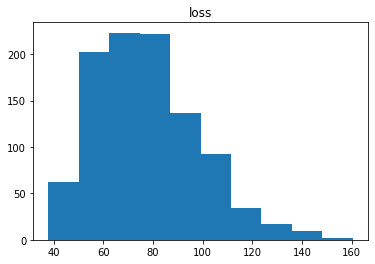

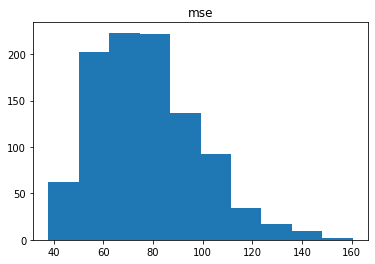

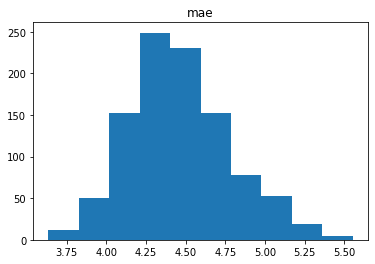

In [35]:
plt.figure(0)
plt.hist(loss)
plt.title('loss')
print('Average loss:',np.mean(loss))
print('Standard deviation of loss:', np.std(loss))
plt.figure(1)
plt.hist(mse)
plt.title('mse')
print('Average mse:',np.mean(mse))
print('Standard deviation of mse:', np.std(mse))
plt.figure(2)
plt.hist(mae)
plt.title('mae')
print('Average mae:',np.mean(mae))
print('Standard deviation of mae:', np.std(mae))

## Best structure to fit data

In [44]:
frac_train=0.8
shape=(5,) 
input_list=['Zr_at','Nb_at','Mo_at','Ti_at','Cr_at']
output_list= ['E (GPa)','H (GPa)']

output_neurones= 2
f_opt='rmsprop'
crit_loss='mse'
list_metrics=['mse','mae']
nb_epochs=200
filename='A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv'
best_model_dir=[]
best_model_name=[]
list_nb_layers=[]
list_neurones=[]
list_act=[]
for nb_layers in range (1,6):
    for nb_neurones_per_layer in range (1,21):
        list_nb_layers.append(nb_layers)
        nb_neurones=nb_neurones_per_layer*np.ones(nb_layers) 
        nb_neurones=[int(x) for x in nb_neurones]
        list_neurones.append(nb_neurones)
        activations=[]
        for h in range(nb_layers):
            activations.append('relu')
        list_act.append(activations)
        best_model_dir.append('Best_network/Structures')
        best_model_name.append(str(nb_layers)+'_layers'+str(nb_neurones_per_layer)+'_neurones_per_layers') 

In [45]:
nb_threads = 10 # number of proc that can work in parallel
work_list=[] # argument list of the fonction that is going to run in parallel
for i in range (0,len(list_nb_layers)): # generate work list
    work_list.append([filename,
                      frac_train, 
                      shape, 
                      input_list, 
                      output_list,
                      list_nb_layers[i],
                      list_neurones[i],
                      output_neurones,
                      list_act[i],
                      f_opt,
                      crit_loss,
                      list_metrics,
                      nb_epochs,
                      best_model_dir[i],
                      best_model_name[i]])

nb_batch = ceil(len(work_list)/ nb_threads) # batch: group of nb_thread that are going to be run
    
tasks_lists = []
for i in range(nb_batch): # group the work list element per batch
    tasks_list = [] # correspond to the arguments of the function that are going to be run in parallel in batch i
    for args in work_list[nb_threads*i:nb_threads*(i+1)]:
        tasks_list.append(args)
    tasks_lists += [tasks_list]  #list of list 
list_x_test=[]
list_y_test=[]
list_x_train=[]
list_y_train=[]   

           

In [46]:
len(work_list)

100

In [47]:
for i in range(nb_batch):
    print("running batch:" + str(i))
    print(tasks_lists[i])
    pool = Pool(process=1)
    X_Y=pool.map(mf.regression, tasks_lists[i])
        
    for j in range (nb_threads):
        list_x_test.append(X_Y[j][0])
        list_y_test.append(X_Y[j][1])
        list_x_train.append(X_Y[j][2])
        list_y_train.append(X_Y[j][3])

running batch:0
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 1, [1], 2, ['relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Structures', '1_layers1_neurones_per_layers'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 1, [2], 2, ['relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Structures', '1_layers2_neurones_per_layers'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 1, [3], 2, ['relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Structures', '1_layers3_neurones_per_layers'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], 

running batch:3
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [11, 11], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Structures', '2_layers11_neurones_per_layers'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [12, 12], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Structures', '2_layers12_neurones_per_layers'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 2, [13, 13], 2, ['relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Structures', '2_layers13_neurones_per_layers'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_

running batch:6
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 4, [1, 1, 1, 1], 2, ['relu', 'relu', 'relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Structures', '4_layers1_neurones_per_layers'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 4, [2, 2, 2, 2], 2, ['relu', 'relu', 'relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Structures', '4_layers2_neurones_per_layers'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 4, [3, 3, 3, 3], 2, ['relu', 'relu', 'relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Structures', '4_layers3_neurones_per_layers'], ['A:/BASE DE DONNEES/Nanoindentation/P

running batch:9
[['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 5, [11, 11, 11, 11, 11], 2, ['relu', 'relu', 'relu', 'relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Structures', '5_layers11_neurones_per_layers'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 5, [12, 12, 12, 12, 12], 2, ['relu', 'relu', 'relu', 'relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Structures', '5_layers12_neurones_per_layers'], ['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers.csv', 0.8, (5,), ['Zr_at', 'Nb_at', 'Mo_at', 'Ti_at', 'Cr_at'], ['E (GPa)', 'H (GPa)'], 5, [13, 13, 13, 13, 13], 2, ['relu', 'relu', 'relu', 'relu', 'relu'], 'rmsprop', 'mse', ['mse', 'mae'], 200, 'Best_network/Structures', '5_layers13_neurones_p